In [1]:
# There are no categorical values in this data set, therefore, there is no need to create dummy features
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error,mean_squared_log_error
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from statsmodels.tsa.stattools import adfuller 
from pmdarima import auto_arima
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data loading
data0 = pd.read_csv("a.us.txt", index_col=0)
data1 = pd.read_csv("aa.us.txt", index_col=0)
data2 = pd.read_csv("aaap.us.txt", index_col=0)
data3 = pd.read_csv("aaba.us.txt", index_col=0)
data4 = pd.read_csv("aac.us.txt", index_col=0)
data5 = pd.read_csv("aal.us.txt", index_col=0)
data6 = pd.read_csv("aamc.us.txt", index_col=0)
data7 = pd.read_csv("aame.us.txt", index_col=0)
data8 = pd.read_csv("aan.us.txt", index_col=0)
data9 = pd.read_csv("aaoi.us.txt", index_col=0)

# Create a list of the different stocks for later use
stock_list = [data0, data1, data2, data3, data4, data5, data6, data7, data8, data9]

# We are storing the names of the different stocks that correspond to each data
names = ['a', 'aa', 'aaap', 'aaba', 'aac', 'aal', 'aamc', 'aame', 'aan', 'aaoi'] 

In [3]:
data0.index = pd.to_datetime(data0.index)
data1.index = pd.to_datetime(data1.index)
data2.index = pd.to_datetime(data2.index)
data3.index = pd.to_datetime(data3.index)
data4.index = pd.to_datetime(data4.index)
data5.index = pd.to_datetime(data5.index)
data6.index = pd.to_datetime(data6.index)
data7.index = pd.to_datetime(data7.index)
data8.index = pd.to_datetime(data8.index)
data9.index = pd.to_datetime(data9.index)

In [6]:
# We want to fit the data to the train dataset which is going to be 80% of the dataset
def fit(df):
    global model_train
    model_train=df.iloc[:int(df.shape[0]*0.80)]
    global valid
    valid=df.iloc[int(df.shape[0]*0.80):]
    global y_pred
    y_pred=valid.copy()

In [7]:
# Checking Stasionarity - Dicky Fuller Test
def test_stationarity(df):
    
    #Determining rolling statistics
    rolmean = df.rolling(4).mean() # around 4 weeks on each month
    rolstd = df.rolling(4).std()
    
    #Plot rolling statistics:
    orig = plt.plot(df, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput['p-value'] < 0.05:
        print('result : time series is stationary')
    else: print('result : time series is not stationary') 

In [8]:
# We are trying to find the best arima order for the arima model

fit(data0)
model_scores_r2=[]
model_scores_mse=[]
model_scores_rmse=[]
model_scores_mae=[]
model_scores_rmsle=[]
model_arima= auto_arima(model_train['Close'],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
              suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train['Close'])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11268.963, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11270.240, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=11272.130, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=11270.137, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11270.233, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11262.827, Time=1.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11263.831, Time=1.88 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11260.396, Time=1.37 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=11272.173, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11274.087, Time=0.85 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11217.363, Time=3.06 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=11168.000, Time=2.89 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=11271.039, Time=0.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11269.356, Time=1.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=11220.716, Time=2.98

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [11]:
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat

In [12]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)

a


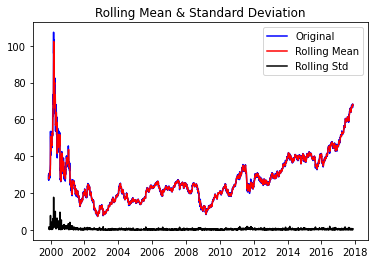

Results of Dickey-Fuller Test:
Test Statistic                   -1.208904
p-value                           0.669754
#Lags Used                       32.000000
Number of Observations Used    4488.000000
Critical Value (1%)              -3.431808
Critical Value (5%)              -2.862184
Critical Value (10%)             -2.567113
dtype: float64
result : time series is not stationary
aa


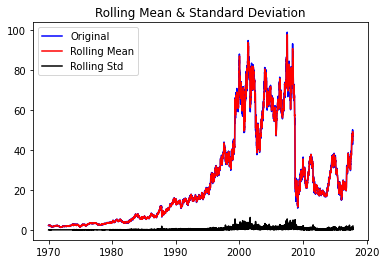

Results of Dickey-Fuller Test:
Test Statistic                    -1.848885
p-value                            0.356476
#Lags Used                        39.000000
Number of Observations Used    12034.000000
Critical Value (1%)               -3.430894
Critical Value (5%)               -2.861780
Critical Value (10%)              -2.566898
dtype: float64
result : time series is not stationary
aaap


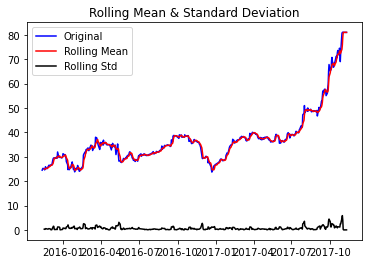

Results of Dickey-Fuller Test:
Test Statistic                   2.128178
p-value                          0.998818
#Lags Used                       0.000000
Number of Observations Used    504.000000
Critical Value (1%)             -3.443392
Critical Value (5%)             -2.867292
Critical Value (10%)            -2.569833
dtype: float64
result : time series is not stationary
aaba


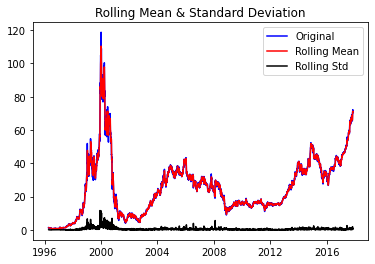

Results of Dickey-Fuller Test:
Test Statistic                   -2.062280
p-value                           0.259950
#Lags Used                       32.000000
Number of Observations Used    5401.000000
Critical Value (1%)              -3.431561
Critical Value (5%)              -2.862075
Critical Value (10%)             -2.567055
dtype: float64
result : time series is not stationary
aac


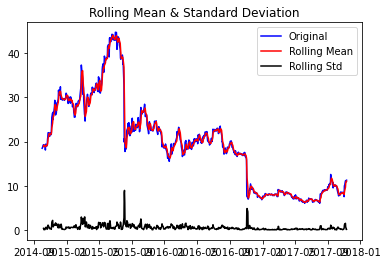

Results of Dickey-Fuller Test:
Test Statistic                  -1.334283
p-value                          0.613346
#Lags Used                      12.000000
Number of Observations Used    772.000000
Critical Value (1%)             -3.438849
Critical Value (5%)             -2.865291
Critical Value (10%)            -2.568767
dtype: float64
result : time series is not stationary
aal


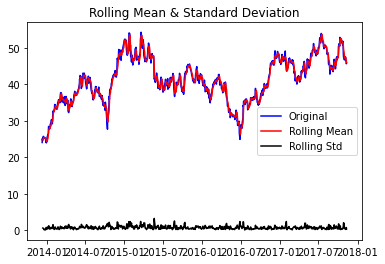

Results of Dickey-Fuller Test:
Test Statistic                  -3.029816
p-value                          0.032202
#Lags Used                       1.000000
Number of Observations Used    987.000000
Critical Value (1%)             -3.436993
Critical Value (5%)             -2.864473
Critical Value (10%)            -2.568332
dtype: float64
result : time series is stationary
aamc


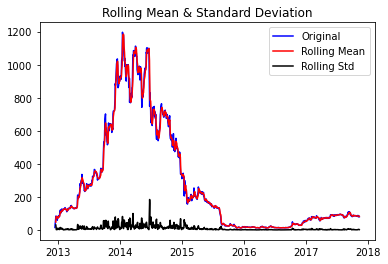

Results of Dickey-Fuller Test:
Test Statistic                   -1.147274
p-value                           0.695856
#Lags Used                       23.000000
Number of Observations Used    1187.000000
Critical Value (1%)              -3.435871
Critical Value (5%)              -2.863978
Critical Value (10%)             -2.568068
dtype: float64
result : time series is not stationary
aame


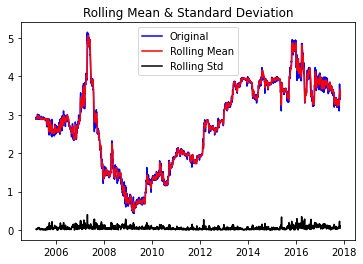

Results of Dickey-Fuller Test:
Test Statistic                   -1.513417
p-value                           0.526864
#Lags Used                        5.000000
Number of Observations Used    2920.000000
Critical Value (1%)              -3.432591
Critical Value (5%)              -2.862530
Critical Value (10%)             -2.567297
dtype: float64
result : time series is not stationary
aan


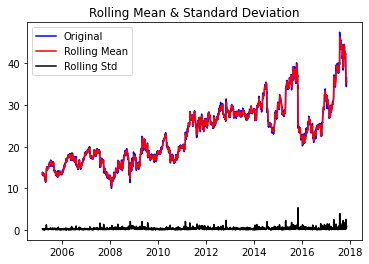

Results of Dickey-Fuller Test:
Test Statistic                   -1.913828
p-value                           0.325584
#Lags Used                        0.000000
Number of Observations Used    3200.000000
Critical Value (1%)              -3.432395
Critical Value (5%)              -2.862444
Critical Value (10%)             -2.567251
dtype: float64
result : time series is not stationary
aaoi


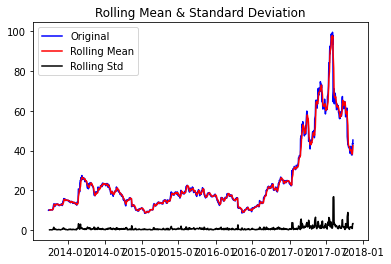

Results of Dickey-Fuller Test:
Test Statistic                   -1.513189
p-value                           0.526977
#Lags Used                       14.000000
Number of Observations Used    1026.000000
Critical Value (1%)              -3.436740
Critical Value (5%)              -2.864361
Critical Value (10%)             -2.568272
dtype: float64
result : time series is not stationary


In [13]:
for i in range(0,10):
    print(names[i])
    test_stationarity(stock_list[i]['Close'])

We can see that data5 or aal stock is stationary, therefore, we will not use the ARIMA model on it. Using the function above, we will look at data0 since it is included in our non stationary datasets.

In [14]:
series = data0['Close']
X = series.values
size = int(len(X) * 0.80)  
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,3))
    model_fit = model.fit()
    ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
    resid = model_fit.resid
    diff = difference(history)
    yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.564


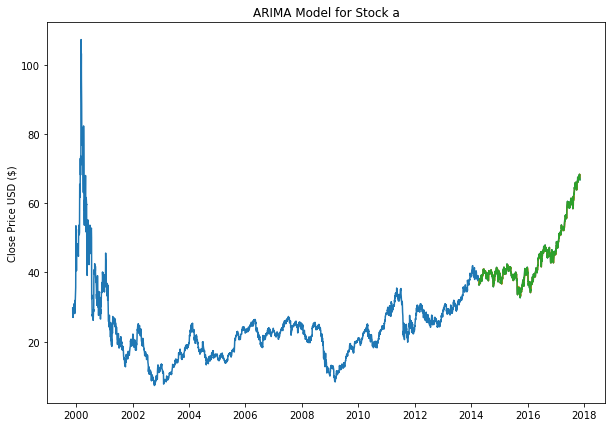

In [15]:
x = data0.index

plt.figure(figsize=(10,7))
plt.title('ARIMA Model for Stock a')
plt.ylabel('Close Price USD ($)')
plt.plot(data0['Close'])
plt.plot(x[size:], predictions)
plt.plot(x[size:], test)
# plt.legend(['Original', 'Validated', 'Predicted'])
plt.show()

In [16]:
list_of_tuples = list(zip(predictions, test))
df0 = pd.DataFrame(list_of_tuples, columns=['Predicted', 'Actual'])
df0['Difference'] = test - predictions
df0.set_index(data0.index[size:])

,Predicted,Actual,Difference
Date,,,
2014-04-11,37.395026,36.439,-0.956026
2014-04-14,36.526739,36.353,-0.173739
2014-04-15,36.437127,36.671,0.233873
2014-04-16,36.776872,37.065,0.288128
2014-04-17,37.181379,37.733,0.551621
...,...,...,...
2017-11-06,68.395913,68.220,-0.175913
2017-11-07,68.275773,68.250,-0.025773
2017-11-08,68.288747,68.110,-0.178747


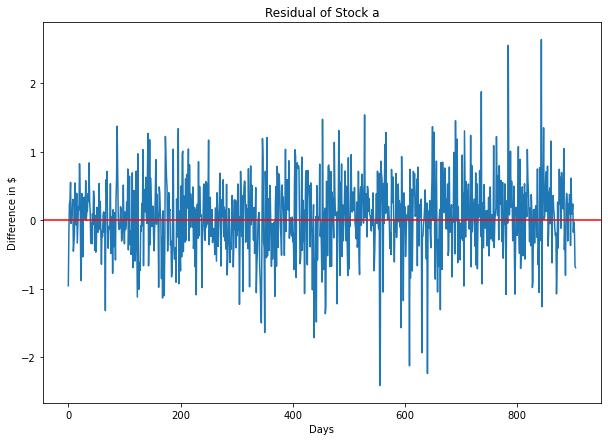

In [17]:
plt.figure(figsize=(10,7))
plt.plot(df0['Difference'])
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual of Stock a')
plt.xlabel('Days')
plt.ylabel('Difference in $')
plt.show()

In [18]:
print('The average residual is:', df0['Difference'].mean())

The average residual is: 0.03804182375937516


In conclusion, there is an average residual of 0.03804182375937516 for the data0 or 'a' stock. This is pretty good since it shows that we are on average only 3 cents off from the actual stock prices. I used a 80/20 train to test to fit the model on the train data. It has a Test RMSE: 0.564 while using the arima model. For future references, we should run the rest of the other loaded datasets and figure out the best order using auto_arima and then plugging that order in the ARIMA model to predict stock prices. 